## 文字探勘技術

### 中文斷詞

In [1]:
import jieba

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print("Full Mode:", "/ ".join(seg_list))

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print("Default Mode:", "/ ".join(seg_list))


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.883 seconds.
DEBUG:jieba:Loading model cost 0.883 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ ？/ 　/ / 柯/ P/ 否/ 認
Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


### 使用自己定義的辭典

In [4]:
jieba.get_dict_file().name

'/usr/local/lib/python3.9/dist-packages/jieba/dict.txt'

In [5]:
jieba.load_userdict("userdict.txt")

In [11]:
import jieba

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print("Default Mode:", "/ ".join(seg_list))


Default Mode: 大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


### Jieba 繁體

In [12]:
! git clone https://github.com/ldkrsi/jieba-zh_TW

fatal: destination path 'jieba-zh_TW' already exists and is not an empty directory.


In [9]:
! cp -r jieba-zh_TW/jieba/* /usr/local/lib/python3.9/dist-packages/jieba/

In [13]:
import jieba

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print("Default Mode:", "/ ".join(seg_list))


Default Mode: 大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


### 增添新詞

In [14]:
jieba.add_word('柯P',100, 'nr')
jieba.add_word('大巨蛋',100, 'ns')


## 文字雲

In [20]:
article = '''
許多人臉書、IG上滿滿國外旅遊照片，令人好生羨慕！正打算出國的民眾，趕緊辦張信用卡跟上流行熱潮。《卡優新聞網》整理出10大海外高回饋信用卡，像是台北富邦J卡綁定Apple Pay，支付Suica與PASMO卡加值金送10%。玉山Pi拍錢包卡新戶賺6% P幣，聯邦吉鶴卡綁Apple Pay日幣交易拿5%。國泰世華CUBE卡、中國信託LINE Pay卡針對指定國家加碼給5%。一銀、永豐、兆豐外幣交易也有5%高回饋。

　　出國消費刷卡最划算，不僅能延後付款，更能獲得高回饋。其中以台北富邦J卡回饋率最高，在日本、韓國當地實體店家消費給3% LINE POINT與2%刷卡金，將卡片綁定Apple Pay後，支付日本Suica卡與PASMO卡加值金，更有3% LINE POINTS與7%現金回饋，最高回饋率飆上10%。

　　玉山Pi拍錢包信用卡綁定Pi拍錢包APP後，海外消費回饋1% P幣無上限，與3% P幣回饋每月上限400 P幣。近期加入新戶專屬申辦優惠，核卡後90天內一般消費加贈2% P幣，最高給1,000 P幣。雙福利加總後，海外消費回饋衝上6%，竄升為「海外神卡」亞軍。

　　聯邦吉鶴卡專為日本旅遊設計，日幣交易賺3.5%現金回饋無上限，綁定Apple Pay後在日本購物額外贈1.5%刷卡金，合計回饋率達5%。國泰世華CUBE卡與中國信託LINE Pay卡不約而同針對日本、韓國、新加坡與泰國加碼，在活動日期內給5%小樹點或LINE POINTS。

　　第一銀行桃園市市民卡聯名卡、桃園市認同卡新戶，外幣交易享3%現金回饋與紅利5倍送，總和有5%好康；申請一銀icash聯名卡登錄成功，於日韓購物可獲5%刷卡金；iLEO信用卡透過數位帳戶扣繳卡費，綁定3大國際行動支付，海外交易回饋率同樣達5%。

　　永豐幣倍卡為「雙幣卡」，辦卡時同時開立外幣帳戶，存入美元、日圓或歐元後，在國外以指定外幣交易均有2%現金入袋，6月底前加送3%刷卡金，優惠疊加共5%。新戶申辦兆豐宇宙明星BT21信用卡並使用電子帳單，一般消費拿2.5%現金回饋，在國外使用Apple Pay、Google Pay購物再送2.5%刷卡金，合計到手5%。

2023年10大海外交易高回饋信用卡，
'''

In [28]:
! wget -c https://noto-website.storage.googleapis.com/pkgs/Noto-hinted.zip
! unzip Noto-hinted.zip NotoSansCJKtc-Regular.otf


Archive:  Noto-hinted.zip
  inflating: NotoSansCJKtc-Regular.otf  


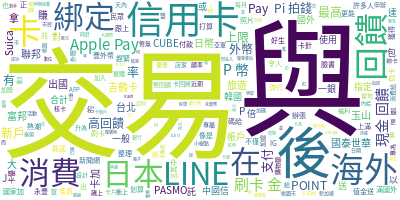

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', font_path = './NotoSansCJKtc-Regular.otf' )
wordcloud.generate(' '.join(jieba.lcut(article)))
wordcloud.to_image()


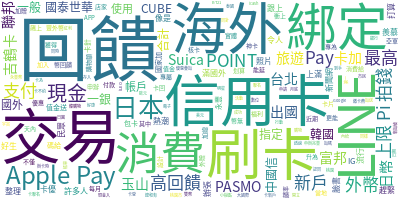

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', font_path = './NotoSansCJKtc-Regular.otf' )
wordcloud.generate(' '.join([e for e in jieba.lcut(article) if len(e) >= 2]))
wordcloud.to_image()


## 練習題
請利用以下文章產生文字雲

In [ ]:
article = '''
聯準會 (Fed) 週三 (22 日) 宣布調升 1 碼，將基準利率走廊升到 4.75% 至 5% 區間，為 2007 年以來最高水平，聯準會主席鮑爾在記者會上提及通膨依舊高漲，澆熄市場對今年降息的預期，並對近期銀行危機和量化緊縮 (QT) 政策提出見解。

聯準會最新利率聲明與鮑爾記者會重點摘錄如下：
重點一：升息 1 碼的原因
聯準會本週在升息問題上面臨艱難的決定，升息可能展現抗通膨決心，但恐會加劇銀行業危機引發的市場動盪。

聯準會最終不願讓去年 3 月以來抗通膨的成果前功盡棄，決定將基準利率調升 1 碼至 4.75% 至 5% 區間。

鮑爾週三在會後記者會上透露，本次會議開始前幾天，聯準會曾考慮過暫停升息，但官員們研判銀行業健康且有韌性，這次的升息行動最終得到聯邦公開市場委員會 (FOMC) 成員一致支持。

重點二：升息循環步入尾聲 但今年不降息
最新聲明和最新利率點狀圖皆暗示升息循環步入尾聲，內容提到，聯準會官員預測「一些額外政策緊縮」可能是適當的，以便使貨幣政策立場具有足夠的限制性，並隨著時間的推移使通膨率恢復到 2%。

最新利率點狀圖顯示，18 位 FOMC 票委中有 10 位預測終點利率為 5.1%，相當於 5% 至 5.25% 的目標區間，與去年 12 月的估計持平，表明大多數官員預計聯準會在今年剩餘的時間內只會再升息一次，接著美國央行將終止抑制通膨的戰爭。

鮑爾透露，銀行面臨壓力的數週之前，數據表明終點利率可能會上升，但現在存在著很多不確定性，銀行壓力抵消這一點。利率路徑將根據情況進行調整，逐次會議作出決定，利率決策仍取決於經濟數據。

芝加哥商業交易所 (CME) 的 FedWatch 工具顯示，交易員預測聯準會 5 月份升息 1 碼可能性超過 50%，但降息預期加深，市場暗示聯邦資金利率將在 12 月降至 4.18% 左右。

然而，鮑爾指出，聯準會認為今年不會降息，今年降息不是聯準會的基本預期。

重點三：量化緊縮 (QT) 立場
美國矽谷銀行倒閉引發金融恐慌，對金融體系穩定的信心正快速流失，隨後聯準會祭出救市計畫，華爾街認為，聯準會本質上已啟動量化寬鬆 (QE)。

聯準會 3 月 12 日推出緊急融資新工具銀行定期融資計畫 (BTFP)，為面臨流動性危機的銀行提供貸款，以避免資金壓力外溢，這促使聯準會資產負債表停止緊縮並有擴張趨勢。

對此，鮑爾週三明確指出，聯準會正在持續大幅縮減資產負債表，不會停止縮表而造成政策扭曲。

鮑爾稱，資產負債表擴張主要反映短期貸款，近期資產負債表擴張與貨幣政策無關，資產負債表擴張是暫時的，這有益於解決銀行業問題，聯準會官員們還沒有討論過改變縮表計畫的問題。

重點四：矽谷銀行等近期銀行倒閉問題的立場
鮑爾認為，由於一系列銀行業倒閉事件可能會影響到美國經濟，承諾將從本次銀行業危機中汲取教訓。

鮑爾指出：「少數銀行突然陷入艱難的處境，促使聯準會、美國財政部、聯邦存款保險公司 (FDIC) 採取果斷行動，準備動用所有工具來確保銀行系統的安全... 過去一週，美國銀行系統的存款流動有所穩定，銀行系統健康且具有韌性。」

鮑爾研判：「近期一系列銀行業倒閉事件可能會影響到美國經濟，但預測可能只會造成溫和的影響，信貸條件亦可能會大幅收緊，聯準會無須利率政策方面再採取大動作，美國央行正在評估最近所發生的事情，也將從這一事件中吸取教訓，將繼續密切監測形勢。」

關於矽谷銀行破產事件，鮑爾稱，聯準會推出 BTFP 新工具似乎是正確的，這對聯準會沒有帶來風險。矽谷銀行管理層的嚴重失誤導致銀行面臨流動性風險，這可能需要進行監管和監督方面的變革。

聯準會副主席巴爾 (Michael Barr) 將領導對矽谷銀行倒閉事件的審查，審查結果將於 5 月 1 日公布。鮑爾週三稱，相信對矽谷銀行的監管評估將讓人感到滿意。

重點五：對通膨和就業市場的觀點
聯準會週三調整經濟預測，略微調高通膨預期。官員們預估今年整體個人消費支出物價指數 (PCE) 預測值為 3.3%，高於去年 12 月份的 3.1%。失業率估值下調至 4.5%，低於去年底預測的 4.6%。國內生產毛額 (GDP) 成長率估值從去年底的 0.5% 下修至 0.4%。

鮑爾稱，美國通膨依然太高，勞動力市場仍然緊張。如果沒有實現物價穩定性，美國經濟將不會良好地運作，通膨回落至 2% 的目標還有很長一段路要走。

鮑爾還提到，通膨回落確實在發生，薪資增長顯示出一些緩解的跡象，聯準會非常關注的非住房服務價格仍未出現下降，今年失業率存在高度不確定性，非常難以預測。

重點六：經濟軟著陸的可能性
儘管美國經濟有下行風險，鮑爾認為，依舊有機會實現經濟軟著陸。

他指出：「經濟衰退往往是非線性的，因此很難透過模型預測，當前的銀行危機很難看出會對軟著陸造成什麼影響，但我依舊認為有一條通往軟著陸的道路。」

市場變化
聯準會 (Fed) 主席鮑爾 (Jerome Powell) 澆熄今年降息希望，而且美國財政府葉倫暫時無意擴大聯邦存款保險制度的覆蓋範圍和保險額度，美股震盪收黑，道瓊收盤大跌逾 500 點，美元指數走弱，金價下滑，十年期美債殖利率下探，暫報 3.451%。

華爾街分析
Integrity Asset Management 投資組合經理 Joe Gilbert 預測：「鮑爾試圖兩全其美、安撫鷹派和鴿派，這最終可能是今年最後一次升息，但鮑爾必須讓市場相信這不是因為那樣會過度放鬆金融環境，銀行業倒閉帶來的經濟疲軟尚未顯現，聯準會知道這一點，但他們不能危言聳聽。」

Inflation Insights 創始人 Omair Sharif 點評：「鑑於離年底還有很長一段路要走，而且如果銀行業的壓力很快得到緩解，聯準會可能會重新更加密切地關注通膨，這似乎不是一個高門檻，一些額外的政策緊縮可能是合適的，不指望 5.1% 將會是終點利率。」

Oanda 高級市場分析師 Edward Moya 指出：「鮑爾一開始就指出銀行體系穩健，但財政部長葉倫打消了這一想法，葉倫關於存款保險的評論令投資者感到不安，因為銀行業的動盪不會很快消失。」
'''